In [24]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [25]:
# target function
a = 1.
b = 2.
f = lambda x: a*x+b

#test
f(2.)

4.0

In [32]:
#model
#nn.Linear
in_dim = 1
out_dim = 1

model = nn.Sequential(
    nn.Linear(in_dim, 2),
    nn.ReLU(),
    nn.Linear(2, out_dim)
)

In [33]:
#loss function 
criterion = nn.MSELoss()

In [34]:
#optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [35]:
#training data

batch_size = 5

x_train = torch.linspace(0, batch_size-1, batch_size).reshape(batch_size, 1)
y_train = a * x_train + b


In [36]:
# Train the model

num_epochs = 10000

for epoch in range(num_epochs):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))


Epoch [500/10000], Loss: 0.2545
Epoch [1000/10000], Loss: 0.1187
Epoch [1500/10000], Loss: 0.0570
Epoch [2000/10000], Loss: 0.0269
Epoch [2500/10000], Loss: 0.0088
Epoch [3000/10000], Loss: 0.0030
Epoch [3500/10000], Loss: 0.0010
Epoch [4000/10000], Loss: 0.0004
Epoch [4500/10000], Loss: 0.0001
Epoch [5000/10000], Loss: 0.0000
Epoch [5500/10000], Loss: 0.0000
Epoch [6000/10000], Loss: 0.0000
Epoch [6500/10000], Loss: 0.0000
Epoch [7000/10000], Loss: 0.0000
Epoch [7500/10000], Loss: 0.0000
Epoch [8000/10000], Loss: 0.0000
Epoch [8500/10000], Loss: 0.0000
Epoch [9000/10000], Loss: 0.0000
Epoch [9500/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000


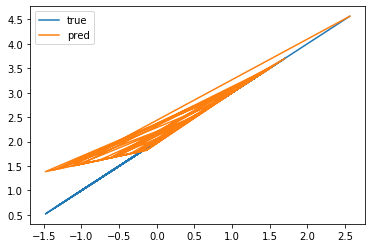

In [53]:
#test
x_ = torch.randn(50,1)
y_ = f(x_)
plt.plot(x_, y_, label='true')

y_pred = model(x_)
plt.plot(x_, y_pred.detach().numpy(), label='pred')

plt.legend()

__Todo__

- Improve the above code.
- train a model to $f(x) = x^2 + 1$